<a href="https://colab.research.google.com/github/felipe24I/AprendizajeMaquina/blob/main/Parcial1_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Parcial 1 TAM**

###Nombre completo: Felipe Idárraga Quintero
###Profesor: Andrés Marino Alvarez Meza
###Materia: Teoria de aprendizaje de maquina

---

#**Descarga y Carga de Dataset Ames Housing desde Google Drive**

Descarga automática de archivo CSV y carga en Pandas

**Prompt:** Escribe un script en Python que descargue un archivo CSV desde Google Drive utilizando la librería gdown. El archivo tiene el ID 1_t50XqVVeTCIaCQ88Ee2V__ATkwZk4jd y debe guardarse localmente con el nombre AmesHousing.csv

In [55]:
!pip install gdown --upgrade --quiet

In [56]:
# -------------------------------
# 1. IMPORTAR LIBRERÍAS
# -------------------------------
import gdown # Para descarga desde Google Drive
import pandas as pd # Para manejo de datos
from IPython.display import display, HTML # Para visualización mejorada

# -------------------------------
# 2. CONFIGURACIÓN INICIAL
# -------------------------------
FILE_ID = "1_t50XqVVeTCIaCQ88Ee2V__ATkwZk4jd" # ID único del archivo en Drive
NOMBRE_ARCHIVO = "AmesHousing.csv" # Nombre local que tendrá el archivo

# -------------------------------
# 3. DESCARGA DEL ARCHIVO
# -------------------------------
url = f"https://drive.google.com/uc?id={FILE_ID}"
gdown.download(url, NOMBRE_ARCHIVO, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1_t50XqVVeTCIaCQ88Ee2V__ATkwZk4jd
To: /content/AmesHousing.csv
100%|██████████| 964k/964k [00:00<00:00, 62.6MB/s]


'AmesHousing.csv'

#**1 Lectura de base de datos con pandas**

**prompt:** Extiende el script anterior para cargar el archivo CSV descargado (AmesHousing.csv) en un DataFrame de Pandas. Muestra las primeras filas del DataFrame (df.head()) usando IPython.display.HTML para renderizar la salida como una tabla ancha

In [57]:
# Cargar el archivo CSV descargado a un DataFrame de Pandas
df = pd.read_csv("AmesHousing.csv")

# Mostrar las primeras filas del DataFrame con formato HTML (formato de tabla ancha)
display(HTML(df.head().to_html()))

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#**2. Definición de variables predictoras (X) y variable objetivo (Y)**

Se Identifica cuál es la variable que se quiere predecir y se separan las características que se usarán como entrada del modelo

##**Y=** SalePrice (Precio de venta de una casa)

#**Eliminación de columnas que contienen más del 50% de datos faltantes**

In [58]:
# =============================================
# MANEJO DE VALORES FALTANTES
# =============================================
'''
def mostrar_valores_faltantes(df, umbral=0):
    """
    Muestra columnas con valores faltantes, ordenadas por cantidad descendente

    Args:
        df (pd.DataFrame): DataFrame a analizar
        umbral (int): Mostrar solo columnas con más de 'umbral' valores nulos
    """
    print("\nValores faltantes por columna:")
    faltantes = df.isnull().sum()
    faltantes = faltantes[faltantes > umbral].sort_values(ascending=False)
    if not faltantes.empty:
        display(faltantes)
    else:
        print("No hay columnas con valores faltantes")
'''
def eliminar_columnas_con_nulos(df, umbral, inplace=False):
    """
    Elimina columnas con alto porcentaje de valores nulos

    Args:
        df (pd.DataFrame): DataFrame a procesar
        umbral (float): Porcentaje umbral para eliminar columnas (0-100)
        inplace (bool): Si True, modifica el DataFrame original

    Returns:
        pd.DataFrame: DataFrame procesado (si inplace=False)
        list: Lista de columnas eliminadas
    """
    # Calcular porcentaje de nulos
    porcentaje_nulos = df.isnull().sum() / len(df) * 100

    # Identificar columnas a eliminar
    columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > umbral].index.tolist()

    # Mostrar información
    if columnas_a_eliminar:
        print("\nColumnas a eliminar (>{}% nulos):".format(umbral))
        for col in columnas_a_eliminar:
            print(f"- {col}: {porcentaje_nulos[col]:.2f}% nulos")

        # Eliminar columnas
        if inplace:
            df.drop(columns=columnas_a_eliminar, inplace=True)
            print(f"\nSe eliminaron {len(columnas_a_eliminar)} columnas.")
            print(f"Nuevo shape del DataFrame: {df.shape}")
            return columnas_a_eliminar
        else:
            df_limpiado = df.drop(columns=columnas_a_eliminar)
            print(f"\nSe eliminaron {len(columnas_a_eliminar)} columnas.")
            print(f"Nuevo shape del DataFrame: {df_limpiado.shape}")
            return df_limpiado, columnas_a_eliminar
    else:
        print("\nNo hay columnas que cumplan el criterio de eliminación")
        return df if not inplace else None, []

if __name__ == "__main__":
    # 1. Mostrar valores faltantes
    #mostrar_valores_faltantes(df)

    # 2. Eliminar columnas con >70% nulos (creando copia)
    df_limpiado, columnas_eliminadas = eliminar_columnas_con_nulos(df, umbral=50)



Columnas a eliminar (>50% nulos):
- Alley: 93.24% nulos
- Mas Vnr Type: 60.58% nulos
- Pool QC: 99.56% nulos
- Fence: 80.48% nulos
- Misc Feature: 96.38% nulos

Se eliminaron 5 columnas.
Nuevo shape del DataFrame: (2930, 77)


In [59]:
df_limpiado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

#**Eliminación de columnas que no aportan información para la predicción del precio de venta de una casa**

In [60]:
col_drop= ['PID', 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Bsmt Half Bath', '3Ssn Porch', 'Pool Area', 'Misc Val', 'Order', 'Fireplace Qu']
df_limpiado.drop(columns = col_drop, inplace = True)
print(f"Nuevo shape del DataFrame: {df_limpiado.shape}")

Nuevo shape del DataFrame: (2930, 64)


#**Eliminación de columnas categoricas que no se pueden ordenar y no aportan mucha información para la predicción del precio de venta de una casa**

In [61]:
col_drop2= ['Land Contour', 'Roof Style', 'Exterior 2nd', 'BsmtFin Type 2', 'Electrical', 'Sale Type', 'Sale Condition']
df_limpiado.drop(columns = col_drop2, inplace = True)
print(f"Nuevo shape del DataFrame: {df_limpiado.shape}")


Nuevo shape del DataFrame: (2930, 57)


#**Información de columnas del dataframe**

In [62]:
df_limpiado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     2930 non-null   int64  
 1   MS Zoning       2930 non-null   object 
 2   Lot Frontage    2440 non-null   float64
 3   Lot Area        2930 non-null   int64  
 4   Lot Shape       2930 non-null   object 
 5   Lot Config      2930 non-null   object 
 6   Land Slope      2930 non-null   object 
 7   Neighborhood    2930 non-null   object 
 8   Condition 1     2930 non-null   object 
 9   Bldg Type       2930 non-null   object 
 10  House Style     2930 non-null   object 
 11  Overall Qual    2930 non-null   int64  
 12  Overall Cond    2930 non-null   int64  
 13  Year Built      2930 non-null   int64  
 14  Year Remod/Add  2930 non-null   int64  
 15  Exterior 1st    2930 non-null   object 
 16  Mas Vnr Area    2907 non-null   float64
 17  Exter Qual      2930 non-null   o

#**3. División del conjunto de datos en entrenamiento y prueba (70% train) (30% test)**

Se separan los datos en un conjunto de entrenamiento (train) y otro de prueba (test) para evaluar el desempeño real del modelo

In [63]:
from sklearn.model_selection import train_test_split
# Partición entrenamiento y prueba
# Tamaño Xtrain 70%, Tamaño Xtest 30%

Xtrain, Xtest = train_test_split(df_limpiado,test_size=0.3)
col_sal = "SalePrice"
ytrain = Xtrain[col_sal]
ytest = Xtest[col_sal]
Xtrain.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)


#**4. Preprocesamiento de características**

Se aplican transformaciones como imputación de valores faltantes, escalado, codificación de variables categóricas, y selección de variables.

#**Imputación de valores faltantes en variables categóricas de salida usando la moda**

In [64]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")#se utiliza estimador de moda
ytrain = imputer.fit_transform(pd.DataFrame(ytrain)).reshape(-1)#ajuste sobre la salida
ytest = imputer.transform(pd.DataFrame(ytest)).reshape(-1)#evaluar sobre datos de test

print(ytrain.shape, ytest.shape)

(2051,) (879,)


#**Definición de clase personalizada de preprocesamiento compatible con scikit-learn**

**Prompt**: Diseña una clase PriceOrdinalEncoder en scikit-learn que codifique variables categóricas ordinalmente según la media del target (SalePrice), manteniendo las numéricas sin escalar. La clase debe: 1) Automáticamente detectar columnas numéricas si no se especifican, 2) Imputar missing values (moda para categóricas, mediana para numéricas), 3) Ordenar categorías por el promedio del target y codificarlas con OrdinalEncoder, 4) Opcionalmente incluir el target en el output. Usa esta clase para transformar las variables categóricas del dataset de housing (Xtrain, Xtest), incluyendo columnas como 'Neighborhood', 'Kitchen Qual', y 'Foundation'. Asegúrate de manejar valores desconocidos en test asignándoles -1

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

class PriceOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, variables=None, numeric_vars=None):
        self.variables = variables
        self.numeric_vars = numeric_vars
        self.category_orders = {}
        self.encoder = None
        self.cat_imputer = None
        self.num_imputer = None

        # Órdenes predefinidos para las 25 variables
        self.ordinal_orders = {
            # 1. Variables de Calidad/Condición (de peor a mejor)
            "Exter Qual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Exter Cond": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Bsmt Qual": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Bsmt Cond": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Heating QC": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Kitchen Qual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Garage Qual": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Garage Cond": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],

            # 2. Características Físicas
            "Bsmt Exposure": ['None', 'No', 'Mn', 'Av', 'Gd'],
            "BsmtFin Type 1": ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
            "Garage Finish": ['None', 'Unf', 'RFn', 'Fin'],
            "Functional": ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
            "Paved Drive": ['N', 'P', 'Y'],
            "Land Slope": ['Sev', 'Mod', 'Gtl'],
            "Lot Shape": ['IR3', 'IR2', 'IR1', 'Reg'],
            "Central Air": ['N', 'Y'],

            # 3. Ubicación y Zonificación
            "MS Zoning": ['A (agr)', 'C (all)', 'FV', 'I (all)', 'RH', 'RL', 'RP', 'RM'],
            "Neighborhood": [
                'MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'OldTown', 'Edwards',
                'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel',
                'SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn', 'CollgCr', 'ClearCr',
                'Crawfor', 'Veenker', 'Somerst', 'Timber', 'StoneBr', 'NoRidge',
                'NridgHt'
            ],
            "Condition 1": ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],

            # 4. Estructura y Construcción
            "Bldg Type": ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'],
            "House Style": ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'],
            "Foundation": ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'],
            "Exterior 1st": [
                'AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd',
                'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco',
                'VinylSd', 'Wd Sdng', 'WdShing'
            ],
            "Lot Config": ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'],
            "Garage Type": ['None', '2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd']
        }

        # Si no se especifican variables, usar todas las que tienen órdenes predefinidos
        if self.variables is None:
            self.variables = list(self.ordinal_orders.keys())

    def fit(self, X, y=None):
        df = X.copy()

        # Detectar numéricas si no fueron especificadas
        if self.numeric_vars is None:
            self.numeric_vars = df.select_dtypes(include=['number']).columns.difference(self.variables).tolist()

        # Imputación
        self.cat_imputer = SimpleImputer(strategy="most_frequent")
        self.num_imputer = SimpleImputer(strategy="median")

        df[self.variables] = self.cat_imputer.fit_transform(df[self.variables])
        df[self.numeric_vars] = self.num_imputer.fit_transform(df[self.numeric_vars])

        # Crear orden de categorías
        categories_list = []
        for var in self.variables:
            if var in self.ordinal_orders:
                self.category_orders[var] = self.ordinal_orders[var]
            else:
                # Para variables sin orden predefinido, usar orden alfabético
                unique_cats = sorted(df[var].dropna().unique())
                self.category_orders[var] = unique_cats
            categories_list.append(self.category_orders[var])

        self.encoder = OrdinalEncoder(
            categories=categories_list,
            dtype=int,
            handle_unknown="use_encoded_value",
            unknown_value=-1
        )
        self.encoder.fit(df[self.variables])

        return self

    def transform(self, X):
        df = X.copy()

        # Aplicar imputación
        df[self.variables] = self.cat_imputer.transform(df[self.variables])
        df[self.numeric_vars] = self.num_imputer.transform(df[self.numeric_vars])

        # Aplicar encoding
        df[self.variables] = self.encoder.transform(df[self.variables])

        return df

# 1. Definir las variables (opcional, ya viene con las 25 por defecto)
variables_categoricas = [
    "MS Zoning", "Neighborhood", "Lot Shape", "Land Slope",
    "Exter Qual", "Exter Cond", "Bsmt Qual", "Bsmt Cond",
    "Bsmt Exposure", "BsmtFin Type 1", "Heating QC", "Kitchen Qual",
    "Functional", "Garage Finish", "Garage Qual", "Garage Cond", "Paved Drive",
    "Lot Config", "Condition 1", "Bldg Type", "House Style",
    "Exterior 1st", "Foundation", "Central Air", "Garage Type"
]

# 2. Crear el encoder
encoder = PriceOrdinalEncoder(variables=variables_categoricas)

# 3. Ajustar y transformar
encoder.fit(Xtrain)
Xtrain_encoded = encoder.transform(Xtrain)
Xtest_encoded = encoder.transform(Xtest)
Xtrain_encoded['SalePrice'] = ytrain
Xtest_encoded['SalePrice'] = ytest

# 4. Verificar órdenes asignados
print("Órdenes de categorías:")
for var, order in encoder.category_orders.items():
    print(f"\n{var}:")
    print(order)

Órdenes de categorías:

MS Zoning:
['A (agr)', 'C (all)', 'FV', 'I (all)', 'RH', 'RL', 'RP', 'RM']

Neighborhood:
['MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'OldTown', 'Edwards', 'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel', 'SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor', 'Veenker', 'Somerst', 'Timber', 'StoneBr', 'NoRidge', 'NridgHt']

Lot Shape:
['IR3', 'IR2', 'IR1', 'Reg']

Land Slope:
['Sev', 'Mod', 'Gtl']

Exter Qual:
['Po', 'Fa', 'TA', 'Gd', 'Ex']

Exter Cond:
['Po', 'Fa', 'TA', 'Gd', 'Ex']

Bsmt Qual:
['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

Bsmt Cond:
['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

Bsmt Exposure:
['None', 'No', 'Mn', 'Av', 'Gd']

BsmtFin Type 1:
['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']

Heating QC:
['Po', 'Fa', 'TA', 'Gd', 'Ex']

Kitchen Qual:
['Po', 'Fa', 'TA', 'Gd', 'Ex']

Functional:
['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']

Garage Finish:
['None', 'Unf', 'RFn', 'Fin']

Garage Qual:
['None', 'Po

In [66]:
Xtrain.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold
2040,50,RM,NaN,12358,IR1,Inside,Gtl,OldTown,Feedr,1Fam,...,660.0,TA,TA,Y,237,0,0,0,5,2007
2731,120,RL,NaN,5271,IR1,Inside,Mod,ClearCr,Norm,1Fam,...,445.0,TA,TA,Y,0,80,0,184,12,2006
1145,20,RL,NaN,7153,Reg,Inside,Gtl,SawyerW,Norm,1Fam,...,496.0,TA,TA,Y,112,51,0,0,6,2008
2373,120,RL,53.0,4043,Reg,Inside,Gtl,NPkVill,Norm,TwnhsE,...,440.0,TA,TA,Y,0,55,0,225,7,2006
2883,120,RM,41.0,5748,IR1,Inside,Mod,Crawfor,Norm,TwnhsE,...,495.0,TA,TA,Y,123,53,0,153,2,2006


In [67]:
Xtrain_encoded.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold,SalePrice
2040,50.0,7,68.0,12358.0,2,4,2,4,1,0,...,3,3,2,237.0,0.0,0.0,0.0,5.0,2007.0,128500
2731,120.0,5,68.0,5271.0,2,4,1,17,2,0,...,3,3,2,0.0,80.0,0.0,184.0,12.0,2006.0,190000
1145,20.0,5,68.0,7153.0,3,4,2,12,2,0,...,3,3,2,112.0,51.0,0.0,0.0,6.0,2008.0,179200
2373,120.0,5,53.0,4043.0,3,4,2,10,2,4,...,3,3,2,0.0,55.0,0.0,225.0,7.0,2006.0,146300
2883,120.0,7,41.0,5748.0,2,4,1,18,2,4,...,3,3,2,123.0,53.0,0.0,153.0,2.0,2006.0,375000


In [68]:
Xtrain_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 2040 to 218
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     2051 non-null   float64
 1   MS Zoning       2051 non-null   int64  
 2   Lot Frontage    2051 non-null   float64
 3   Lot Area        2051 non-null   float64
 4   Lot Shape       2051 non-null   int64  
 5   Lot Config      2051 non-null   int64  
 6   Land Slope      2051 non-null   int64  
 7   Neighborhood    2051 non-null   int64  
 8   Condition 1     2051 non-null   int64  
 9   Bldg Type       2051 non-null   int64  
 10  House Style     2051 non-null   int64  
 11  Overall Qual    2051 non-null   float64
 12  Overall Cond    2051 non-null   float64
 13  Year Built      2051 non-null   float64
 14  Year Remod/Add  2051 non-null   float64
 15  Exterior 1st    2051 non-null   int64  
 16  Mas Vnr Area    2051 non-null   float64
 17  Exter Qual      2051 non-null   int6

#**5. Análisis exploratorio básico**

#**Matriz de correlación**

In [69]:
# Correlación
corr = Xtrain_encoded.corr()
corr.style.background_gradient(cmap='coolwarm')

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold,SalePrice
MS SubClass,1.000000,0.091262,-0.399925,-0.176654,0.043428,0.055791,0.014665,-0.051010,-0.021780,0.743913,0.444050,0.030752,-0.079504,0.023070,0.020128,-0.095760,-0.020272,0.008098,-0.052730,0.047244,0.066103,-0.025512,0.056827,0.044642,-0.068162,-0.067613,-0.127892,-0.226157,-0.028340,-0.082612,-0.251662,0.304632,0.064245,0.005540,0.131315,0.164030,-0.022001,0.257614,-0.047055,0.027447,-0.024704,-0.041126,0.097827,0.068331,-0.010985,-0.035789,-0.099595,0.025146,-0.044275,-0.022521,-0.017626,-0.021398,-0.019113,-0.050306,0.006890,-0.041717,-0.095267
MS Zoning,0.091262,1.000000,-0.159723,-0.074267,0.117875,0.019760,-0.014478,-0.428928,-0.037471,0.012818,0.049097,-0.173339,0.206984,-0.340675,-0.183559,-0.034564,-0.057685,-0.215410,0.084208,-0.295512,-0.235770,-0.055097,-0.026648,-0.106195,-0.064399,0.003285,-0.074579,-0.140671,-0.158761,-0.074427,-0.131298,0.025810,-0.078945,-0.053448,-0.179758,-0.110471,0.017742,0.064825,-0.173732,-0.019309,-0.037355,-0.064863,0.185395,-0.284441,-0.204372,-0.163715,-0.190685,-0.122208,-0.091338,-0.129527,-0.033836,-0.172909,0.128898,0.011954,-0.012459,-0.001635,-0.194386
Lot Frontage,-0.399925,-0.159723,1.000000,0.341185,-0.114849,-0.163950,-0.063518,0.258186,-0.005392,-0.430096,-0.065469,0.190095,-0.055106,0.104376,0.075892,0.053316,0.203499,0.130464,-0.009466,0.094927,0.147903,0.042470,0.162990,0.048384,0.171024,0.030306,0.110721,0.299894,0.061802,0.063907,0.421800,-0.016307,0.320862,0.094675,0.149863,0.021910,0.209450,0.019284,0.167642,0.312243,0.004710,0.214938,-0.245160,0.054018,0.211199,0.299710,0.334990,0.065102,0.041581,0.060155,0.083046,0.131677,-0.006126,0.070712,0.034994,0.018772,0.348170
Lot Area,-0.176654,-0.074267,0.341185,1.000000,-0.274129,-0.100145,-0.325996,0.167334,0.035545,-0.237087,-0.035613,0.078678,-0.032311,0.009636,0.005218,-0.010780,0.105231,0.051464,0.003585,0.013758,0.069819,0.030210,0.181490,0.026673,0.149340,0.089867,0.019833,0.208278,0.010161,0.049881,0.298078,0.030682,0.263228,0.107790,0.124397,0.029073,0.143750,-0.018000,0.061054,0.207358,-0.078039,0.237791,-0.123920,-0.022766,0.107820,0.167233,0.183861,0.038237,0.011245,0.007077,0.134524,0.072196,0.009470,0.052461,0.006425,-0.005702,0.255073
Lot Shape,0.043428,0.117875,-0.114849,-0.274129,1.000000,0.227169,0.115153,-0.310658,-0.106968,0.031184,-0.069746,-0.265388,0.097244,-0.273108,-0.197254,-0.010309,-0.094855,-0.228314,0.021284,-0.177142,-0.271853,-0.079926,-0.213057,-0.152411,-0.148646,-0.055404,-0.010183,-0.184424,-0.150472,-0.107333,-0.184070,-0.082306,-0.217575,-0.076667,-0.209120,-0.135437,-0.035387,0.091243,-0.185564,-0.118819,-0.029214,-0.187821,0.163881,-0.232570,-0.283550,-0.236427,-0.205379,-0.086087,-0.070016,-0.146351,-0.135418,-0.091743,0.087555,-0.051175,0.000586,0.018786,-0.302696
Lot Config,0.055791,0.019760,-0.163950,-0.100145,0.227169,1.000000,-0.014001,-0.038784,0.069823,0.087646,-0.019322,-0.036000,-0.015249,0.012381,-0.002761,0.023764,-0.033077,-0.013076,-0.046964,-0.010826,-0.005612,-0.010594,-0.034840,0.013627,-0.036981,0.000417,0.003955,-0.033792,0.006325,-0.000143,-0.068882,-0.029215,-0.079092,-0.011363,-0.022819,-0.018061,-0.035011,-0.024031,-0.014005,-0.041710,-0.001029,-0.041952,0.027454,0.005307,-0.046085,-0.080355,-0.069855,-0.009232,0.010342,-0.023217,0.007684,-0.052438,-0.048192,0.001588,0.008932,-0.02420

#**Lista de 3 variables mas correlacionadas con la variable objetivo SalePrice**

In [70]:
print("Top 3 variables más correlacionadas (en magnitud):")
abs(corr["SalePrice"]).sort_values(ascending=False).head(4)

Top 3 variables más correlacionadas (en magnitud):


,SalePrice
SalePrice,1.000000
Overall Qual,0.796359
Gr Liv Area,0.718871
Neighborhood,0.703143


#**En base a las 3 variables más correlacionadas con SalePrice, se crea un dataframe para continuar con el análisis exploratorio básico**

In [71]:
Xm =pd.DataFrame(Xtrain_encoded[['Overall Qual','Gr Liv Area','Neighborhood']],columns=['Overall Qual','Gr Liv Area','Neighborhood'])#definir pandas con atributos seleccionados
Xm['SalePrice'] = ytrain #agregar salida

#**Histrograma de SalePrice y sus 3 variables más correlacionadas**

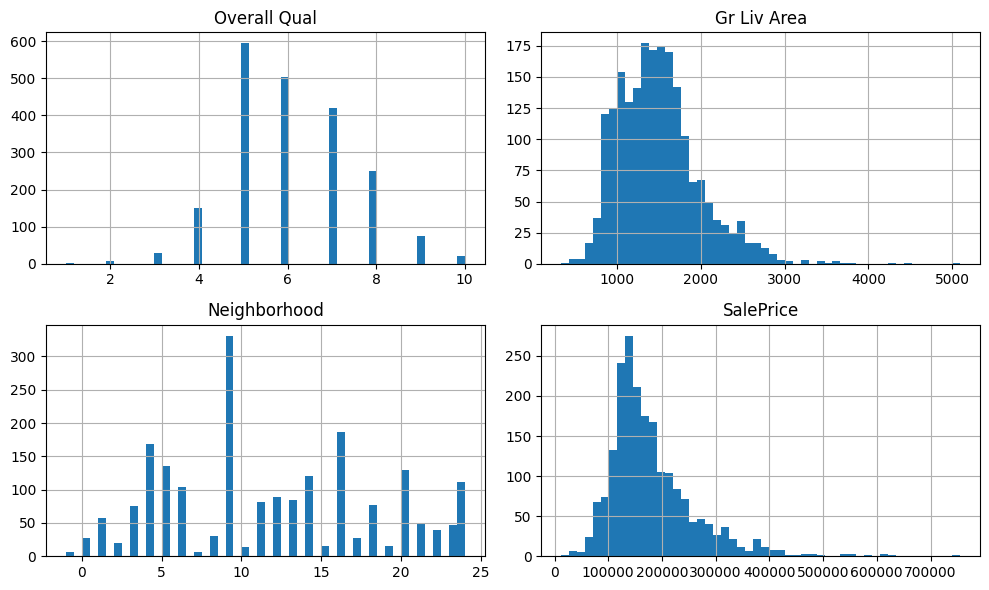

In [72]:
import matplotlib.pyplot as plt
Xm.to_numpy()
Xm.hist(bins=50, figsize=(10,6))
plt.tight_layout()
plt.show()

#**Box Plot de SalePrice y sus 3 variables más correlacionadas**

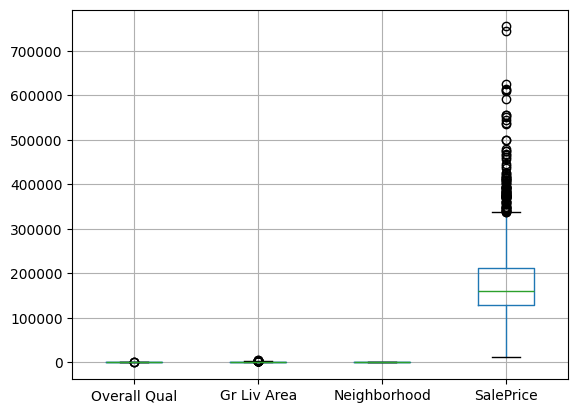

In [73]:
Xm.boxplot()#grafica de caja
plt.show()

#**Scatter con histogramas de SalePrice y sus 3 variables más correlacionadas**

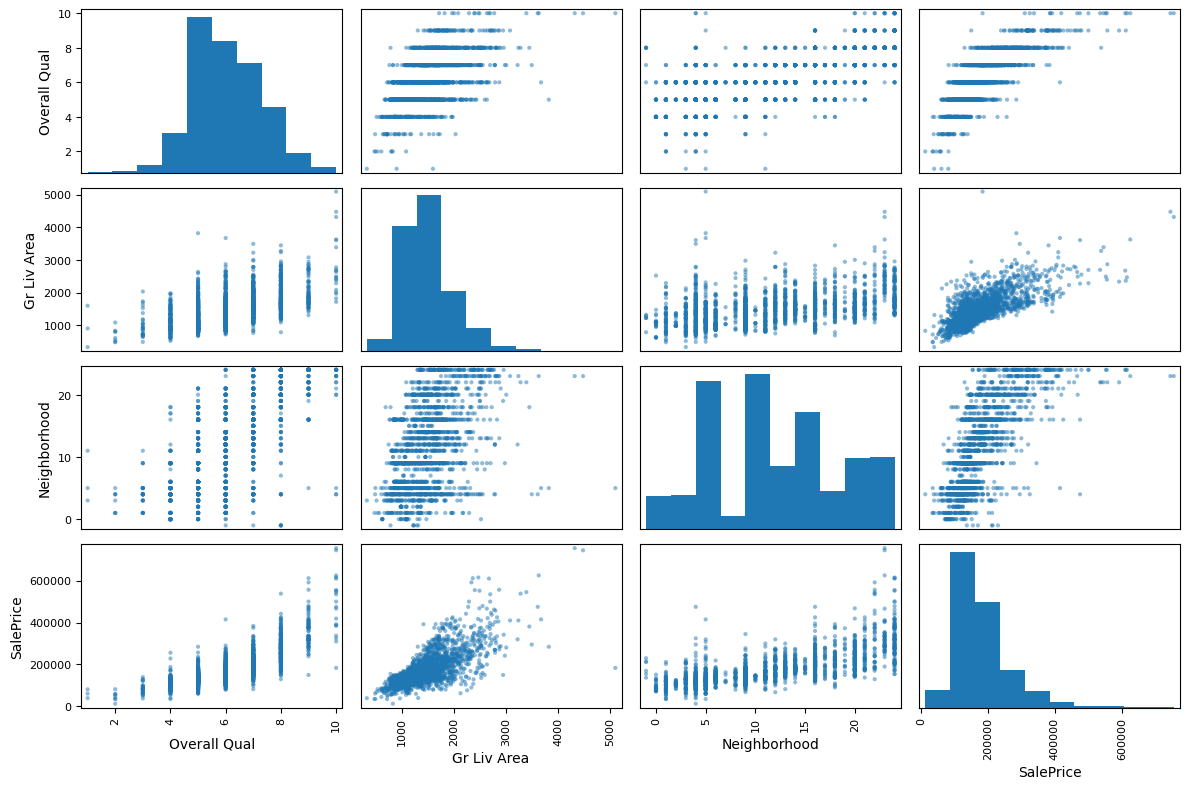

In [74]:
from pandas.plotting import scatter_matrix
scatter_matrix(Xm, figsize=(12, 8)) #scatter con histogramas
plt.tight_layout()
plt.show()

#**Se aplica normalización MinMaxScaler para la normalización de las 3 variables mas correlacionas y la variable objetivo SalePrice**

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Xm_pre_sca = pd.DataFrame(scaler.fit_transform(Xm),columns=Xm.columns)

#**Histogramas**

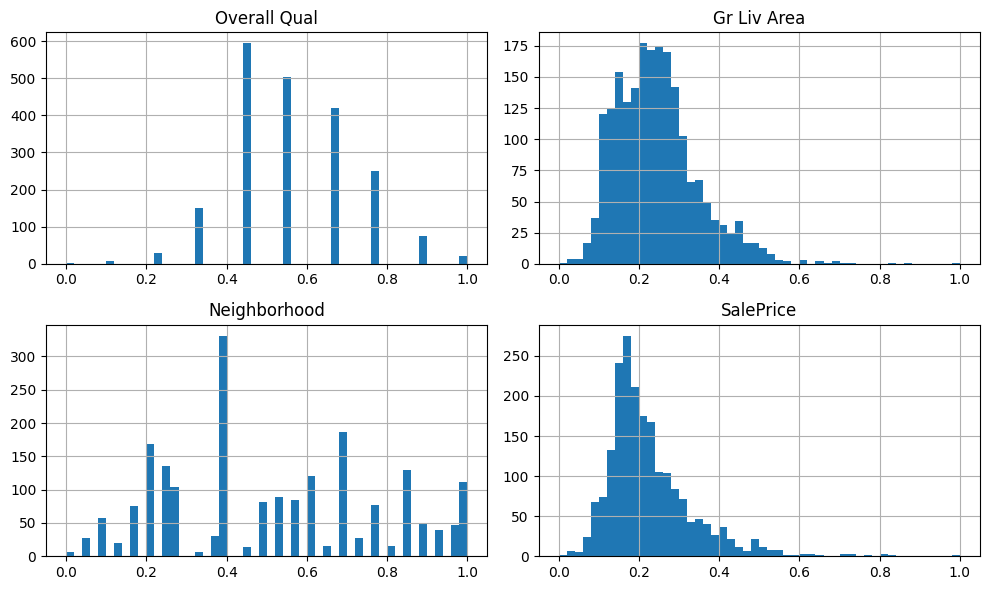

In [76]:
import matplotlib.pyplot as plt
Xm_pre_sca.to_numpy()
Xm_pre_sca.hist(bins=50, figsize=(10,6))
plt.tight_layout()
plt.show()

#**Box Plot**

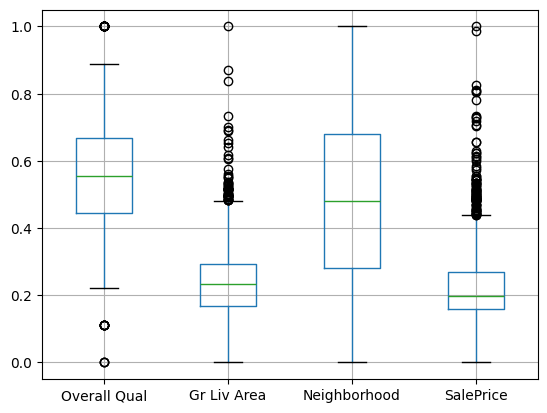

In [77]:
Xm_pre_sca.boxplot()#grafica de caja
plt.show()

#**Scatter con histogramas**

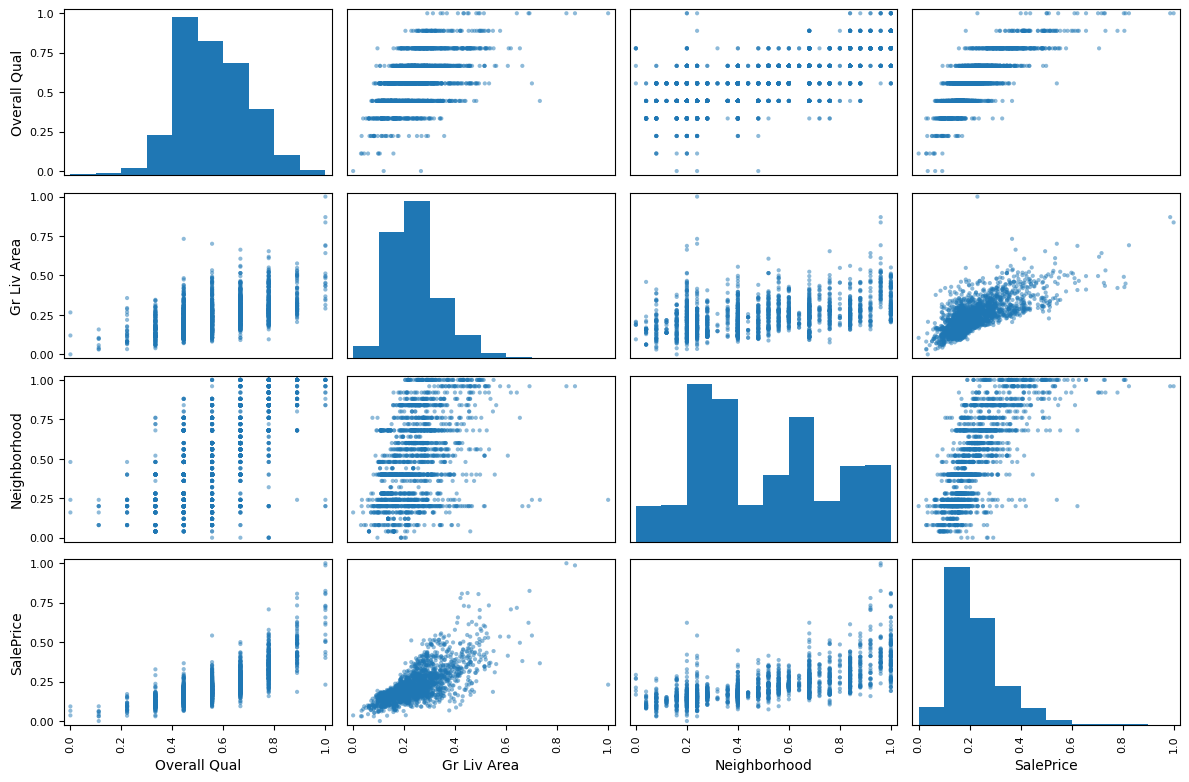

In [78]:
scatter_matrix(Xm_pre_sca, figsize=(12, 8)) #scatter con histogramas
plt.tight_layout()
plt.show()

#**MODELOS**

Para los modelos, eliminamos la variable objetivo del conjunto Xtrain_encoded y xtest_encoded

In [79]:
# Usa los datos originales, sin SalePrice en X
# Si Xtrain_encoded ya tiene SalePrice, hay que quitarla:
Xtrain_encoded = Xtrain_encoded.drop(columns="SalePrice", errors="ignore")
Xtest_encoded = Xtest_encoded.drop(columns="SalePrice", errors="ignore")

#**1.Modelo LinearRegresor**

Los pasos que se realizaron son los siguientes:

1. **Validación Cruzada con Pipeline de Regresión Lineal y Evaluación de Métricas**

2. **Evaluación del Modelo en el Conjunto de Prueba**

3. **Grafico de Dispersión: Valores Reales VS Valores Predichos**

=== Métricas en el conjunto de entrenamiento ===
MAE  = 18756.2444
MSE  = 890132011.9739
R²   = 0.8623
MAPE = 0.1149

=== Métricas en el conjunto de prueba ===
MAE  = 19864.4792
MSE  = 1254318103.0604
R²   = 0.7972
MAPE = 0.1214


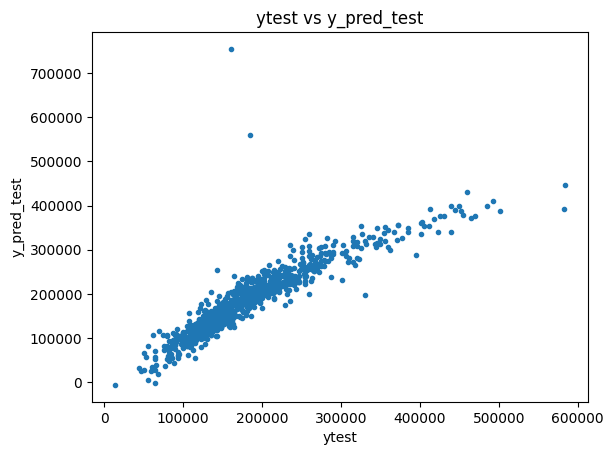

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Pipeline con codificador + escalador + modelo
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression())
])

# Validación cruzada de 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Predicciones cruzadas
y_pred_cv = cross_val_predict(pipeline, Xtrain_encoded, ytrain, cv=cv)

# Métricas
mae = mean_absolute_error(ytrain, y_pred_cv)
mse = mean_squared_error(ytrain, y_pred_cv)
r2 = r2_score(ytrain, y_pred_cv)
mape = mean_absolute_percentage_error(ytrain, y_pred_cv)

# Imprimir
print("=== Métricas en el conjunto de entrenamiento ===")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"R²   = {r2:.4f}")
print(f"MAPE = {mape:.4f}")

# Entrenar pipeline en todo el set de entrenamiento
pipeline.fit(Xtrain_encoded, ytrain)

# Predecir sobre el conjunto de prueba
y_pred_test = pipeline.predict(Xtest_encoded)

# Calcular métricas en el conjunto de prueba
mae_test = mean_absolute_error(ytest, y_pred_test)
mse_test = mean_squared_error(ytest, y_pred_test)
r2_test = r2_score(ytest, y_pred_test)
mape_test = mean_absolute_percentage_error(ytest, y_pred_test)

# Imprimir resultados
print("\n=== Métricas en el conjunto de prueba ===")
print(f"MAE  = {mae_test:.4f}")
print(f"MSE  = {mse_test:.4f}")
print(f"R²   = {r2_test:.4f}")
print(f"MAPE = {mape_test:.4f}")

#Grafico de Dispersión: Valores Reales VS Valores Predichos
plt.plot(ytest, y_pred_test, '.')
plt.xlabel('ytest')
plt.ylabel('y_pred_test')
plt.title('ytest vs y_pred_test')
plt.show()

#**2. Modelo Lasso**

El código realiza una optimización de hiperparámetros para un modelo Lasso (regresión lineal con regularización L1) usando tres métodos distintos:

1. Grid Search (búsqueda exhaustiva en una grilla de parámetros).

2. Random Search (búsqueda aleatoria en un espacio de parámetros).

3. Bayesian Optimization (optimización bayesiana con Optuna).

In [81]:
!pip install optuna

[I 2025-05-24 04:56:19,096] A new study created in memory with name: no-name-e51f0290-12c7-44fe-aeb1-fdc532f91014
[I 2025-05-24 04:56:19,172] Trial 0 finished with value: 777529272.46967 and parameters: {'alpha': 1.6075719531158905}. Best is trial 0 with value: 777529272.46967.
[I 2025-05-24 04:56:19,246] Trial 1 finished with value: 777513812.949784 and parameters: {'alpha': 0.37105740529485104}. Best is trial 1 with value: 777513812.949784.
[I 2025-05-24 04:56:19,320] Trial 2 finished with value: 777630508.778353 and parameters: {'alpha': 4.008428417349936}. Best is trial 1 with value: 777513812.949784.
[I 2025-05-24 04:56:19,428] Trial 3 finished with value: 777512938.9731059 and parameters: {'alpha': 0.0004961394683805291}. Best is trial 3 with value: 777512938.9731059.
[I 2025-05-24 04:56:19,538] Trial 4 finished with value: 777512936.4530078 and parameters: {'alpha': 0.05779793697722327}. Best is trial 4 with value: 777512936.4530078.
[I 2025-05-24 04:56:19,645] Trial 5 finished 


Best Grid Search Result:
  alpha = 233.572147
  MSE   = 858753895.503408
  MAE   = 17971.896587
  MAPE  = 0.110049
  R2    = 0.878787

Best Random Search Result:
  alpha = 157.418900
  MSE   = 858733362.097176
  MAE   = 17970.576064
  MAPE  = 0.110058
  R2    = 0.879149

Best Bayesian Optimization Result:
  alpha = 0.029983
  MSE   = 777512924.995547
  MAE   = 18027.330515
  MAPE  = 0.110584
  R2    = 0.879709

Performance on Test Set with Best Model:
  MSE   = 1254216435.894685
  MAE   = 19862.743149
  MAPE  = 0.121354
  R2    = 0.797177


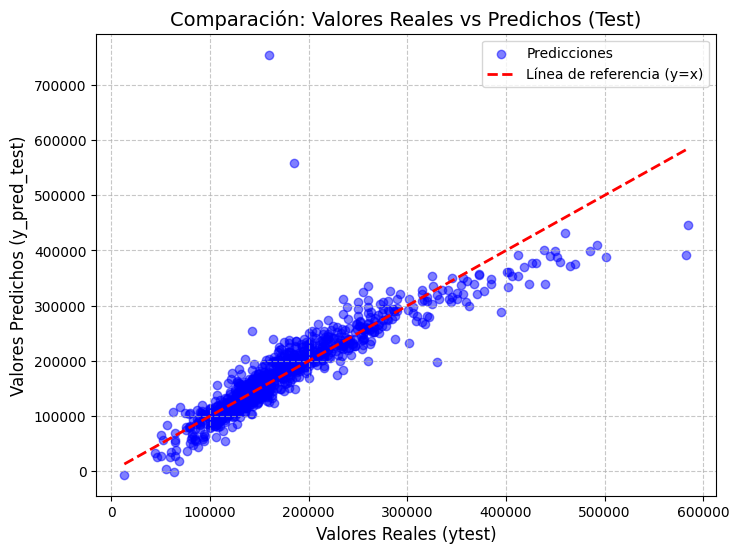

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform
import optuna
from optuna.samplers import GPSampler
import warnings
warnings.filterwarnings('ignore')

# Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Rango de hiperparámetros
alphas = np.logspace(-3, 3, 20)

# Función para evaluar múltiples métricas
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'MSE': mean_squared_error(y, y_pred),
        'MAE': mean_absolute_error(y, y_pred),
        'MAPE': mean_absolute_percentage_error(y, y_pred),
        'R2': r2_score(y, y_pred)
    }

# Grid Search
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
grid_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con múltiples métricas
grid_results = []
for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    model = Lasso(alpha=param['alpha']).fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(model, Xtrain_encoded, ytrain)
    grid_results.append({
        'alpha': param['alpha'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# Random Search
param_dist = {'alpha': loguniform(1e-3, 1e3)}
random_search = RandomizedSearchCV(Lasso(), param_distributions=param_dist,
                                 n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con múltiples métricas
random_results = []
for param, score in zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score']):
    model = Lasso(alpha=param['alpha']).fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(model, Xtrain_encoded, ytrain)
    random_results.append({
        'alpha': param['alpha'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# Bayesian Optimization
bayes_results = []

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 1e2, log=True)
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', Lasso(alpha=alpha, random_state=42))
    ])
    pipe.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipe, Xtrain_encoded, ytrain)

    bayes_results.append({
        'trial': trial.number,
        'alpha': alpha,
        'MSE': metrics['MSE'],
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

    return metrics['MSE']

study = optuna.create_study(direction='minimize', sampler=GPSampler())
study.optimize(objective, n_trials=20)

# Resultados del Grid Search
best_grid_index = np.argmin([res['MSE'] for res in grid_results])
best_grid = grid_results[best_grid_index]
print("\nBest Grid Search Result:")
print(f"  alpha = {best_grid['alpha']:.6f}")
print(f"  MSE   = {best_grid['MSE']:.6f}")
print(f"  MAE   = {best_grid['MAE']:.6f}")
print(f"  MAPE  = {best_grid['MAPE']:.6f}")
print(f"  R2    = {best_grid['R2']:.6f}")

# Resultados del Random Search
best_random_index = np.argmin([res['MSE'] for res in random_results])
best_random = random_results[best_random_index]
print("\nBest Random Search Result:")
print(f"  alpha = {best_random['alpha']:.6f}")
print(f"  MSE   = {best_random['MSE']:.6f}")
print(f"  MAE   = {best_random['MAE']:.6f}")
print(f"  MAPE  = {best_random['MAPE']:.6f}")
print(f"  R2    = {best_random['R2']:.6f}")

# Resultados de Bayesian Optimization
best_bayes_index = np.argmin([res['MSE'] for res in bayes_results])
best_bayes = bayes_results[best_bayes_index]
print("\nBest Bayesian Optimization Result:")
print(f"  alpha = {best_bayes['alpha']:.6f}")
print(f"  MSE   = {best_bayes['MSE']:.6f}")
print(f"  MAE   = {best_bayes['MAE']:.6f}")
print(f"  MAPE  = {best_bayes['MAPE']:.6f}")
print(f"  R2    = {best_bayes['R2']:.6f}")

# Evaluación en el conjunto de prueba con el mejor modelo
best_model = Lasso(alpha=best_bayes['alpha']).fit(Xtrain_encoded, ytrain)
y_pred_test = best_model.predict(Xtest_encoded)  # Guardar las predicciones
test_metrics = evaluate_model(best_model, Xtest_encoded, ytest)

print("\nPerformance on Test Set with Best Model:")
print(f"  MSE   = {test_metrics['MSE']:.6f}")
print(f"  MAE   = {test_metrics['MAE']:.6f}")
print(f"  MAPE  = {test_metrics['MAPE']:.6f}")
print(f"  R2    = {test_metrics['R2']:.6f}")

# --- Gráfico de dispersión ytest vs y_pred_test ---
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_test, alpha=0.5, color='blue', label='Predicciones')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()],
         '--r', linewidth=2, label='Línea de referencia (y=x)')
plt.xlabel('Valores Reales (ytest)', fontsize=12)
plt.ylabel('Valores Predichos (y_pred_test)', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos (Test)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

In [83]:
from optuna.visualization import (plot_optimization_history,plot_param_importances, plot_parallel_coordinate,plot_contour)
plot_optimization_history(study)

#**3 Modelo ElasticNet**

El código realiza una optimización de hiperparámetros para un modelo ElasticNet (combinación de regularización L1 y L2) usando tres métodos:

1. Grid Search (búsqueda exhaustiva en una grilla de parámetros).

2. Random Search (búsqueda aleatoria en un espacio de parámetros).

3. Bayesian Optimization (optimización inteligente con Optuna).

[I 2025-05-24 04:57:30,701] A new study created in memory with name: no-name-5efcd3b9-660d-4d30-9629-45745f89181a
[I 2025-05-24 04:57:30,727] Trial 0 finished with value: 986429363.8823172 and parameters: {'alpha': 0.03813552583958007, 'l1_ratio': 0.491098251897751}. Best is trial 0 with value: 986429363.8823172.
[I 2025-05-24 04:57:30,747] Trial 1 finished with value: 5110995413.367576 and parameters: {'alpha': 6.118239719655558, 'l1_ratio': 0.5501100007570984}. Best is trial 0 with value: 986429363.8823172.
[I 2025-05-24 04:57:30,766] Trial 2 finished with value: 5529247063.400774 and parameters: {'alpha': 12.359222696103362, 'l1_ratio': 0.6463582395211687}. Best is trial 0 with value: 986429363.8823172.
[I 2025-05-24 04:57:30,789] Trial 3 finished with value: 1693544526.382016 and parameters: {'alpha': 0.16090590808505154, 'l1_ratio': 0.2077046325830053}. Best is trial 0 with value: 986429363.8823172.
[I 2025-05-24 04:57:30,822] Trial 4 finished with value: 1226449847.4549172 and pa


Best Grid Search Result:
  alpha    = 0.100000
  l1_ratio = 0.300000
  MSE      = 880190682.818883
  MAE      = 17864.765014
  MAPE     = 0.109179
  R2       = 0.878665

Best Random Search Result:
  alpha    = 0.067249
  l1_ratio = 0.187905
  MSE      = 880410690.765401
  MAE      = 17884.246849
  MAPE     = 0.109364
  R2       = 0.878961

Best Bayesian Optimization Result:
  alpha    = 0.000100
  l1_ratio = 0.900000
  MSE      = 777544369.747359
  MAE      = 18023.343362
  MAPE     = 0.110544
  R2       = 0.879704

Performance on Test Set with Best Model:
  MSE   = 1254215977.217041
  MAE   = 19862.711489
  MAPE  = 0.121354
  R2    = 0.797177


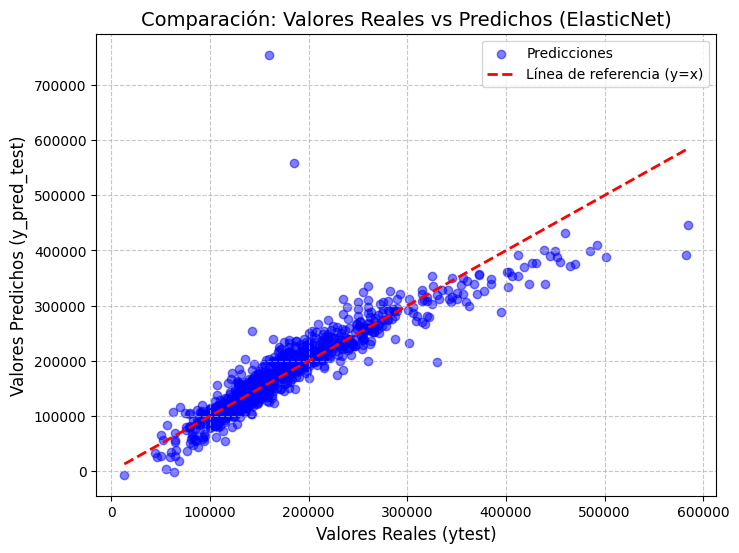

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform, uniform
import optuna
from optuna.samplers import GPSampler
import warnings
warnings.filterwarnings('ignore')

# Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Función para evaluar múltiples métricas
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'MSE': mean_squared_error(y, y_pred),
        'MAE': mean_absolute_error(y, y_pred),
        'MAPE': mean_absolute_percentage_error(y, y_pred),
        'R2': r2_score(y, y_pred)
    }

# --- Grid Search para ElasticNet ---
param_grid = {
    'alpha': np.logspace(-3, 3, 10),
    'l1_ratio': np.linspace(0.1, 0.9, 5)  # Rango de l1_ratio (0=Lasso, 1=Ridge)
}
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=cv,
                          scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con múltiples métricas
grid_results = []
for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    model = ElasticNet(alpha=param['alpha'], l1_ratio=param['l1_ratio']).fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(model, Xtrain_encoded, ytrain)
    grid_results.append({
        'alpha': param['alpha'],
        'l1_ratio': param['l1_ratio'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# --- Random Search para ElasticNet ---
param_dist = {
    'alpha': loguniform(1e-3, 1e3),
    'l1_ratio': uniform(0.1, 0.9)  # Distribución uniforme entre 0.1 y 0.9
}
random_search = RandomizedSearchCV(ElasticNet(), param_distributions=param_dist,
                                 n_iter=20, cv=cv, scoring='neg_mean_squared_error',
                                 random_state=42)
random_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con múltiples métricas
random_results = []
for param, score in zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score']):
    model = ElasticNet(alpha=param['alpha'], l1_ratio=param['l1_ratio']).fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(model, Xtrain_encoded, ytrain)
    random_results.append({
        'alpha': param['alpha'],
        'l1_ratio': param['l1_ratio'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# --- Bayesian Optimization para ElasticNet ---
bayes_results = []

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 1e2, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0.1, 0.9)  # Rango típico para l1_ratio
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42))
    ])
    pipe.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipe, Xtrain_encoded, ytrain)

    bayes_results.append({
        'trial': trial.number,
        'alpha': alpha,
        'l1_ratio': l1_ratio,
        'MSE': metrics['MSE'],
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })
    return metrics['MSE']

study = optuna.create_study(direction='minimize', sampler=GPSampler())
study.optimize(objective, n_trials=20)

# --- Resultados del Grid Search ---
best_grid_index = np.argmin([res['MSE'] for res in grid_results])
best_grid = grid_results[best_grid_index]
print("\nBest Grid Search Result:")
print(f"  alpha    = {best_grid['alpha']:.6f}")
print(f"  l1_ratio = {best_grid['l1_ratio']:.6f}")
print(f"  MSE      = {best_grid['MSE']:.6f}")
print(f"  MAE      = {best_grid['MAE']:.6f}")
print(f"  MAPE     = {best_grid['MAPE']:.6f}")
print(f"  R2       = {best_grid['R2']:.6f}")

# --- Resultados del Random Search ---
best_random_index = np.argmin([res['MSE'] for res in random_results])
best_random = random_results[best_random_index]
print("\nBest Random Search Result:")
print(f"  alpha    = {best_random['alpha']:.6f}")
print(f"  l1_ratio = {best_random['l1_ratio']:.6f}")
print(f"  MSE      = {best_random['MSE']:.6f}")
print(f"  MAE      = {best_random['MAE']:.6f}")
print(f"  MAPE     = {best_random['MAPE']:.6f}")
print(f"  R2       = {best_random['R2']:.6f}")

# --- Resultados de Bayesian Optimization ---
best_bayes_index = np.argmin([res['MSE'] for res in bayes_results])
best_bayes = bayes_results[best_bayes_index]
print("\nBest Bayesian Optimization Result:")
print(f"  alpha    = {best_bayes['alpha']:.6f}")
print(f"  l1_ratio = {best_bayes['l1_ratio']:.6f}")
print(f"  MSE      = {best_bayes['MSE']:.6f}")
print(f"  MAE      = {best_bayes['MAE']:.6f}")
print(f"  MAPE     = {best_bayes['MAPE']:.6f}")
print(f"  R2       = {best_bayes['R2']:.6f}")

# --- Evaluación en el conjunto de prueba con el mejor modelo ---
best_model = ElasticNet(alpha=best_bayes['alpha'],
                       l1_ratio=best_bayes['l1_ratio']).fit(Xtrain_encoded, ytrain)
y_pred_test = best_model.predict(Xtest_encoded)
test_metrics = evaluate_model(best_model, Xtest_encoded, ytest)

print("\nPerformance on Test Set with Best Model:")
print(f"  MSE   = {test_metrics['MSE']:.6f}")
print(f"  MAE   = {test_metrics['MAE']:.6f}")
print(f"  MAPE  = {test_metrics['MAPE']:.6f}")
print(f"  R2    = {test_metrics['R2']:.6f}")

# --- Gráfico de dispersión ytest vs y_pred_test ---
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_test, alpha=0.5, color='blue', label='Predicciones')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()],
         '--r', linewidth=2, label='Línea de referencia (y=x)')
plt.xlabel('Valores Reales (ytest)', fontsize=12)
plt.ylabel('Valores Predichos (y_pred_test)', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos (ElasticNet)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [85]:
from optuna.visualization import (plot_optimization_history,plot_param_importances, plot_parallel_coordinate,plot_contour)
plot_optimization_history(study)

In [86]:
plot_param_importances(study)